# $$\color{darkviolet}{\text{Text Data - Sentiment Analysis}}$$

## Dataset - Click here to download the dataset :
### https://drive.google.com/file/d/1Y0QGzCYvQxlgv83Ojmr9kmLGrlg98o6P/view

### Data Description
#### This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all 500,000+ reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.
### Data includes:
- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
-  256,059 Users and 74,258 products
-  260 users with > 50 reviews


### Task - Your task here is to use your Data Engineering skills to transform the given data(i.e. Text files) to tabular format(i.e. csv file). The columns in this .csv file should be:
- Id - Unique row number
- ProductId - Unique identifier for the product
- UserId - Unique identifier for the user
- ProfileName
- HelpfulnessNumerator - Number of users who found the review helpful
- HelpfulnessDenominator - Number of users who indicated whether they found the review helpful
- Score - Rating between 1 and 5
- Time - Timestamp for the review
- ReviewSummary - Brief summary of the review
- ReviewText - Text of the review
-  NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator


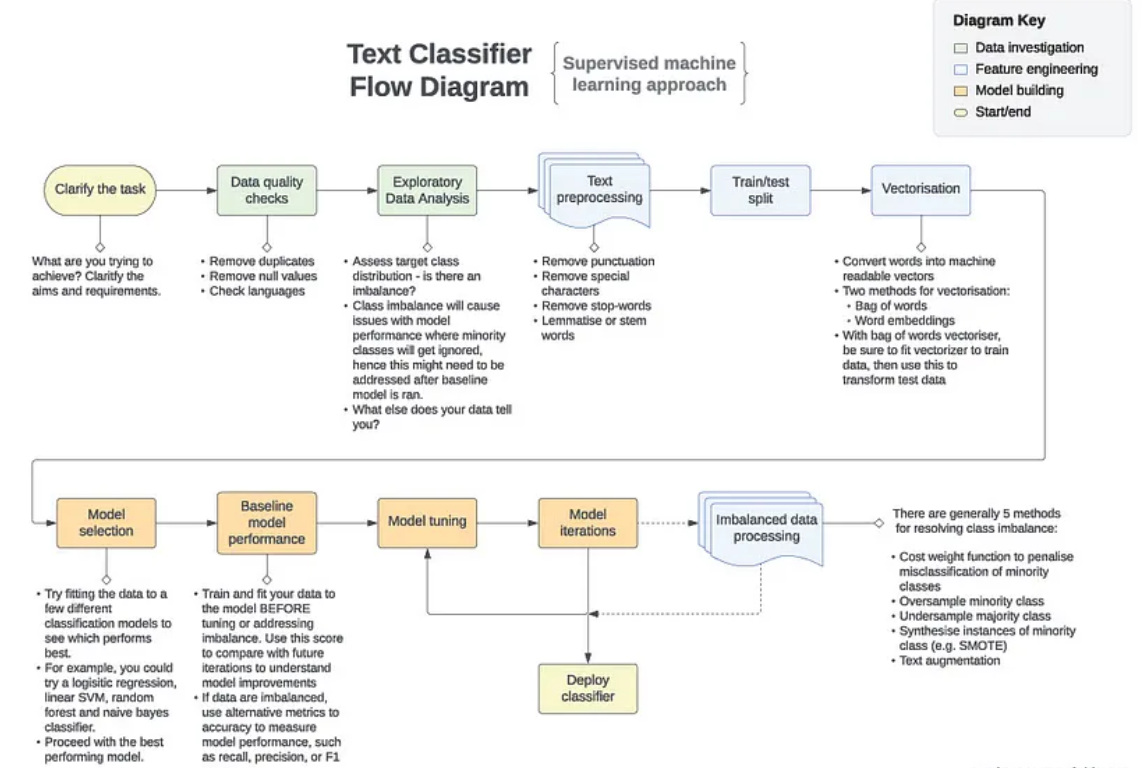

In [41]:
from IPython.display import Image
Image(filename=r"C:\Users\SAI PRAVEEN YERRA\OneDrive\Desktop\workflow.png")

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Importing Zipfile 

In [7]:
import zipfile

with zipfile.ZipFile(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\txt_reviews.zip",'r') as zip_ref:
      zip_ref.extractall('/content/')


In [9]:
 file_names = os.listdir("/content/txt_reviews")
print('Total files:',len(file_names))

Total files: 568454


### Getting the data from the file and converting it into DataFrame

In [14]:
import os
import pandas as pd
from tqdm import tqdm

data = []
ProductID = []
User_Id = []
ProfileName = []
HelpfulnessNumerator = []
HelpfulnessDenominator = []
Score = []
Time = []
ReviewSummary = []
ReviewText = []
file = r"/content/txt_reviews"
for text in tqdm(os.listdir(file)):
    if text.endswith(".txt"):
        with open(os.path.join(file, text), "r", encoding="utf-8") as files:
            Data = files.readlines()
            ProductID.append(Data[0].strip().split(":")[1].strip())
            User_Id.append(Data[1].strip().split(":")[1].strip())
            ProfileName.append(Data[2].strip().split(":")[1].strip())
            HelpfulnessNumerator.append(Data[3].strip().split(":")[1].strip())
            HelpfulnessDenominator.append(Data[4].strip().split(":")[1].strip())
            Score.append(Data[5].strip().split(":")[1].strip())
            Time.append(Data[6].strip().split(":")[1].strip())
            ReviewSummary.append(Data[7].strip().split(":")[1].strip())
            ReviewText.append(Data[8].strip().split(":")[1].strip())
            

df = pd.DataFrame({"ProductID": ProductID, "User_Id": User_Id,"ProfileName":ProfileName,'HelpfulnessNumerator':HelpfulnessNumerator,
                   'HelpfulnessDenominator':HelpfulnessDenominator,'Score':Score,"Time":Time,'ReviewSummary':ReviewSummary,
                   "ReviewText":ReviewText})

df.head()


100%|███████████████████████████████████████████████████████████████████████| 568454/568454 [1:03:43<00:00, 148.68it/s]


ProductID         User_Id       ProfileName HelpfulnessNumerator  \
0  B001E4KFG0  A3SGXH7AUHU8GW        delmartian                    1   
1  B00171APVA  A21BT40VZCCYT4     Carol A. Reed                    0   
2  B0019CW0HE  A2P6ACFZ8FTNVV  Melissa Benjamin                    0   
3  B006F2NYI2  A132DJVI37RB4X         Scottdrum                    2   
4  B000P41A28   A82WIMR4RSVLI        Emrose mom                    0   

  HelpfulnessDenominator Score        Time               ReviewSummary  \
0                      1     5  1303862400       Good Quality Dog Food   
1                      0     5  1351209600            Healthy Dog Food   
2                      1     1  1331164800                         Bad   
3                      5     2  1332374400       Not hot, not habanero   
4                      1     4  1337472000  The best weve tried so far   

                                          ReviewText  
0  I have bought several of the Vitality canned d...  
1  This is a very healthy dog food. Good for thei...  
2  I fed this to my Golden Retriever and he hated...  
3  I have to admit, I was a sucker for the large ...  
4  We have a 7 week old... He had gas and constip...

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductID               568454 non-null  object
 1   User_Id                 568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  object
 4   HelpfulnessDenominator  568454 non-null  object
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [16]:
df.to_csv('Text_data_pfile.csv')

In [30]:
df= pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\Text_data_pfile.csv")
df.head()

Unnamed: 0   ProductID         User_Id             ProfileName  \
0           0  B005VHDMOI  A3UD74MXP5WEKJ      Michael G. Nedwick   
1           1  B004X71550  A3SSFSXPGDOJB5          Ann M Hombordy   
2           2  B0013IVM14  A1X0INU1JI5FJC  Mark Nelson "shadessv"   
3           3  B0018RR8Y0  A1G8Z8K5ICN69A              J. Simpson   
4           4  B00276H5GW  A1IX8KI6GP4XAK             eli "elias"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1326585600   
1                     0                       0      4  1347667200   
2                     0                       0      3  1223251200   
3                     1                       1      4  1249948800   
4                     2                       3      4  1282435200   

                          ReviewSummary  \
0           great taste, little package   
1                  alternative to sugar   
2  Easy Feeding for up to 3oz at a time   
3                         Simply Stevia   
4       great product , great quality .   

                                          ReviewText  
0  Used this on packaged chicken and tuna while d...  
1  I will never be able to eat products with suga...  
2  This product worked really well for my 4 month...  
3  First time we have tried stevia so I have no o...  
4  great product. very clear  expire / production...

In [31]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [10]:
df.HelpfulnessNumerator.astype(int)
df.HelpfulnessDenominator.astype(int)

0         0
1         0
2         0
3         1
4         3
         ..
568449    2
568450    0
568451    2
568452    5
568453    5
Name: HelpfulnessDenominator, Length: 568454, dtype: int32

In [6]:
df['Helpfulness'] = df["HelpfulnessNumerator"].astype(float) / df["HelpfulnessDenominator"].astype(float) * 100
df.Helpfulness.fillna(0,inplace=True)


In [8]:
df.isna().sum()

ProductID                 0
User_Id                   0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [26]:
df.dropna(inplace=True)


In [27]:
df.duplicated().sum()

287

In [29]:
df.drop_duplicates()

ProductID         User_Id                         ProfileName  \
0       B005VHDMOI  A3UD74MXP5WEKJ                  Michael G. Nedwick   
1       B004X71550  A3SSFSXPGDOJB5                      Ann M Hombordy   
2       B0013IVM14  A1X0INU1JI5FJC              Mark Nelson "shadessv"   
3       B0018RR8Y0  A1G8Z8K5ICN69A                          J. Simpson   
4       B00276H5GW  A1IX8KI6GP4XAK                         eli "elias"   
...            ...             ...                                 ...   
568449  B003CK7O36  A1TCFQP6796ZYB                 Layla Jane Anderson   
568450  B002QM9CTA  A31WF4OY9W6I0Z                        NiuHuskieFan   
568451  B000EQYQBO  A3JCSJC01SIAQX          CaliforniaZaineb "Muslima"   
568452  B000AXU99O  A14ZLDIG0XD6AL                            A. Dalio   
568453  B001IZLWNA  A152ST1WCDTPI5  Ueng Sun Chao-chuan "Fashion 50's"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          0                       0      5  1326585600   
1                          0                       0      4  1347667200   
2                          0                       0      3  1223251200   
3                          1                       1      4  1249948800   
4                          2                       3      4  1282435200   
...                      ...                     ...    ...         ...   
568449                     2                       2      3  1330214400   
568450                     0                       0      2  1346112000   
568451                     2                       2      3  1243468800   
568452                     3                       5      2  1259280000   
568453                     5                       5      5  1245715200   

                                            ReviewSummary  \
0                             great taste, little package   
1                                    alternative to sugar   
2                    Easy Feeding for up to 3oz at a time   
3                                           Simply Stevia   
4                         great product , great quality .   
...                                                   ...   
568449  Not strong enough of  a Tea flavor, mostly sme...   
568450                                     threw them out   
568451            Regular tortilla chips.  Not flavorful.   
568452                      it doesn't taste like pumpkin   
568453                     Wrong picture with right taste   

                                               ReviewText  
0       Used this on packaged chicken and tuna while d...  
1       I will never be able to eat products with suga...  
2       This product worked really well for my 4 month...  
3       First time we have tried stevia so I have no o...  
4       great product. very clear  expire / production...  
...                                                   ...  
568449  I usually drink Twinnings earl grey.  I opted ...  
568450  These are so gritty and bad tasting! They're c...  
568451  I have noooo idea what the "blech" titled revi...  
568452  It's not overally strong, which is nice, but I...  
568453  This is actually the purple one, the orange on...  

[568035 rows x 9 columns]

In [9]:
df.isna().sum()

ProductID                 0
User_Id                   0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [19]:
df['User_Id'].duplicated().sum()

312317

In [10]:
import datetime

df['Time'] = df['Time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d/%m/%y'))

In [11]:
df.sort_values(['Time'], ascending=True, inplace=True)

In [15]:
df.drop_duplicates


<bound method DataFrame.drop_duplicates of          ProductID         User_Id                         ProfileName  \
0       B005VHDMOI  A3UD74MXP5WEKJ                  Michael G. Nedwick   
1       B004X71550  A3SSFSXPGDOJB5                      Ann M Hombordy   
2       B0013IVM14  A1X0INU1JI5FJC              Mark Nelson "shadessv"   
3       B0018RR8Y0  A1G8Z8K5ICN69A                          J. Simpson   
4       B00276H5GW  A1IX8KI6GP4XAK                         eli "elias"   
...            ...             ...                                 ...   
568449  B003CK7O36  A1TCFQP6796ZYB                 Layla Jane Anderson   
568450  B002QM9CTA  A31WF4OY9W6I0Z                        NiuHuskieFan   
568451  B000EQYQBO  A3JCSJC01SIAQX          CaliforniaZaineb "Muslima"   
568452  B000AXU99O  A14ZLDIG0XD6AL                            A. Dalio   
568453  B001IZLWNA  A152ST1WCDTPI5  Ueng Sun Chao-chuan "Fashion 50's"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        T

#### Text Cleaning using NLTK and Regex
- Import and download required Libraries and resources 
- Covert the whole text into lowercase
- Remove special characters using RegEx
- Tokenize the text into words 
- Remove stopwords
- Perform lemmatization 
- Join the words back into a cleaned text and Save it into the DataFrame

In [50]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm # import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# convert the ReviewText column to a string
text = df['ReviewText'].astype(str)

# replace NaN values with empty string
df['ReviewText'] = df['ReviewText'].fillna('')

# continue with text cleaning convert to lowercase using apply method
text = df['ReviewText'].apply(lambda x: x.lower())

# remove special characters
text = text.apply(lambda x: re.sub(r'[^\w\s]', '', x))

# tokenize the text into words
words = text.apply(lambda x: nltk.word_tokenize(x))

# remove stopwords using apply method and list comprehension
stop_words = set(stopwords.words('english'))
words = words.apply(lambda x: [word for word in x if word not in stop_words])

# define a lemmatizer function that takes a list of words and returns a list of lemmatized words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(words_list):
    lemmatized_words = []
    for word in tqdm(words_list): # wrap with tqdm loop
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

words = words.apply(lemmatize_words)

# join the words back into a cleaned text using apply method and join method
cleaned_text = words.apply(lambda x: ' '.join(x))

# add the cleaned_text column to the DataFrame
df['ReviewText'] = cleaned_text

# replace NaN values with empty string
df['ReviewText'] = df['ReviewText'].fillna('')

# continue with text cleaning
text = df['ReviewText'].apply(lambda x: x.lower())

# print the DataFrame
print(df)


         ProductID         User_Id  \
0       B0000DJDL4  A1Y20KNCR0SZA1   
1       B00032EGHI  A1XBSM55RTS2IT   
2       B0007KLGC4  A2RV24L38GOIGT   
3       B0000DGF5S   AQDTYG93O2WYO   
4       B0002HVDNY   A3FVAWZNKW9GX   
...            ...             ...   
568029  B002AN4TWK  A2FW8AXHIXCP92   
568030  B000V0CW5A  A3LWC833HQIG7J   
568031  B0014L1PPS  A1M3ZIZTWMZQRQ   
568032  B00390T5JA  A3C6T903HRU0TQ   
568033  B005K4Q34S  A2MR8B8E1TXOK4   

                                             ProfileName  \
0                           Dessartfamily "grandmasoven"   
1                            Celine Johnson "C. Johnson"   
2                                          Mark L. White   
3                                        Paul L. Bardzik   
4       A.Trendl HungarianBookstore.com "What should ...   
...                                                  ...   
568029                                              vick   
568030                                      austin_Larry   
568

In [51]:
df.to_csv('Text_dataprocessed.csv')

# $$\color{darkcyan}{\text{ Exploratory Data Analysis}}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data(CSV) file

In [47]:
data=pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\Text_dataprocessed.csv")
data.head()

ProductID         User_Id  \
0  B0000DJDL4  A1Y20KNCR0SZA1   
1  B00032EGHI  A1XBSM55RTS2IT   
2  B0007KLGC4  A2RV24L38GOIGT   
3  B0000DGF5S   AQDTYG93O2WYO   
4  B0002HVDNY   A3FVAWZNKW9GX   

                                        ProfileName  HelpfulnessNumerator  \
0                      Dessartfamily "grandmasoven"                     8   
1                       Celine Johnson "C. Johnson"                     8   
2                                     Mark L. White                     8   
3                                   Paul L. Bardzik                    15   
4  A.Trendl HungarianBookstore.com "What should ...                     1   

   HelpfulnessDenominator  Score        Time                    ReviewSummary  \
0                       9      5  01-01-2004           The best Kringles ever   
1                       8      5  01-01-2006        Vanilla Coke is On Hiatus   
2                       9      5  01-01-2006                       best candy   
3                      16      1  01-01-2006                       Broken pot   
4                       2      5  01-01-2006  Slowly Smoked Pork is Delicious   

                                          ReviewText  Helpfulness  
0  others try make kringles one bakery make real ...    88.888889  
1  read press release cocacola vanilla coke put h...   100.000000  
2  mallo cup candy best candy ever made put marke...    88.888889  
3  sure plant going survive pot broken opened box...    93.750000  
4  buy karaj hungarian pork loin regularly local ...    50.000000

### Data Manupulation

In [48]:
data['ReviewSummary']=data['ReviewSummary'].apply(lambda x: "Yummy" if x=='Yum' 
                                                  else('Great Product' if x=='Great' 
                                                       else('Great Product' if x=='Great product' 
                                                            else('Disappointing' if x=='Disappointed' 
                                                                 else x))))

In [49]:
data["Response"] = data["Score"].apply(lambda score: "positive" if score >= 3 else "negative")

In [50]:
data["Useful"] = data['Helpfulness'].apply(lambda n: ">75%" if n >= 75 
                                       else ("50-75%" if 50<n<75 else ("25-50%" if n >=25 and n <= 50 
                                                                      else'<25%')))

In [51]:
data['Time'] = pd.to_datetime(data['Time'], format='%d-%m-%Y')
data['Year'] = data['Time'].dt.year

In [53]:
data.to_csv('file176.csv')

In [52]:
data.head(10)

ProductID         User_Id  \
0  B0000DJDL4  A1Y20KNCR0SZA1   
1  B00032EGHI  A1XBSM55RTS2IT   
2  B0007KLGC4  A2RV24L38GOIGT   
3  B0000DGF5S   AQDTYG93O2WYO   
4  B0002HVDNY   A3FVAWZNKW9GX   
5  B0005ZX38Q  A3F7DP6OW7X6CE   
6  B0019H0YZ4  A27YNK61HPN1KB   
7  B0001BVO9Y  A2MWBSYJR74S75   
8  B000A3I3BA   A7GXT5V1VL5UT   
9  B0000D15YQ   A1DEBB7A9T1XS   

                                        ProfileName  HelpfulnessNumerator  \
0                      Dessartfamily "grandmasoven"                     8   
1                       Celine Johnson "C. Johnson"                     8   
2                                     Mark L. White                     8   
3                                   Paul L. Bardzik                    15   
4  A.Trendl HungarianBookstore.com "What should ...                     1   
5                              Cathy Razim "RazCat"                     3   
6                                   E. Sapi "Piros"                     4   
7                                         R. Murphy                    12   
8                                J. Leigh "jleigh7"                    74   
9                           Luca Varallo "lvarallo"                    12   

   HelpfulnessDenominator  Score       Time  \
0                       9      5 2004-01-01   
1                       8      5 2006-01-01   
2                       9      5 2006-01-01   
3                      16      1 2006-01-01   
4                       2      5 2006-01-01   
5                       4      5 2006-01-01   
6                      11      5 2006-01-01   
7                      12      5 2006-01-01   
8                      75      5 2006-01-01   
9                      13      5 2006-01-01   

                              ReviewSummary  \
0                    The best Kringles ever   
1                 Vanilla Coke is On Hiatus   
2                                best candy   
3                                Broken pot   
4           Slowly Smoked Pork is Delicious   
5                               Totally Yum   
6                         Excellent formula   
7  Wonderful on it's own or mixed in drinks   
8               Major time and effort saver   
9        Got to be an Italian to drink this   

                                          ReviewText  Helpfulness  Response  \
0  others try make kringles one bakery make real ...    88.888889  positive   
1  read press release cocacola vanilla coke put h...   100.000000  positive   
2  mallo cup candy best candy ever made put marke...    88.888889  positive   
3  sure plant going survive pot broken opened box...    93.750000  negative   
4  buy karaj hungarian pork loin regularly local ...    50.000000  positive   
5  im college student found product campus store ...    75.000000  positive   
6  baby loved formula first time tried highly rec...    36.363636  positive   
7  finest cola found yetbr br small store near se...   100.000000  positive   
8  remember old way stirring peanut butterbr br t...    98.666667  positive   
9  name sanbitter san pellegrino bitter tell typi...    92.307692  positive   

   Useful  Year  
0    >75%  2004  
1    >75%  2006  
2    >75%  2006  
3    >75%  2006  
4  25-50%  2006  
5    >75%  2006  
6  25-50%  2006  
7    >75%  2006  
8    >75%  2006  
9    >75%  2006

### Data Visualization

In [7]:
plt.figure(figsize=(15,10),dpi=1000)
ax=sns.countplot(x='Response', hue='Score',data=data,palette='cubehelix')
ax.set_xlabel('Response',fontsize=20,fontweight='bold',color='darkgoldenrod')
ax.tick_params(axis='x', labelsize=15)
for container in ax.containers:
     ax.bar_label(container, label_type='edge', fontsize=10, rotation=0)
plt.show()


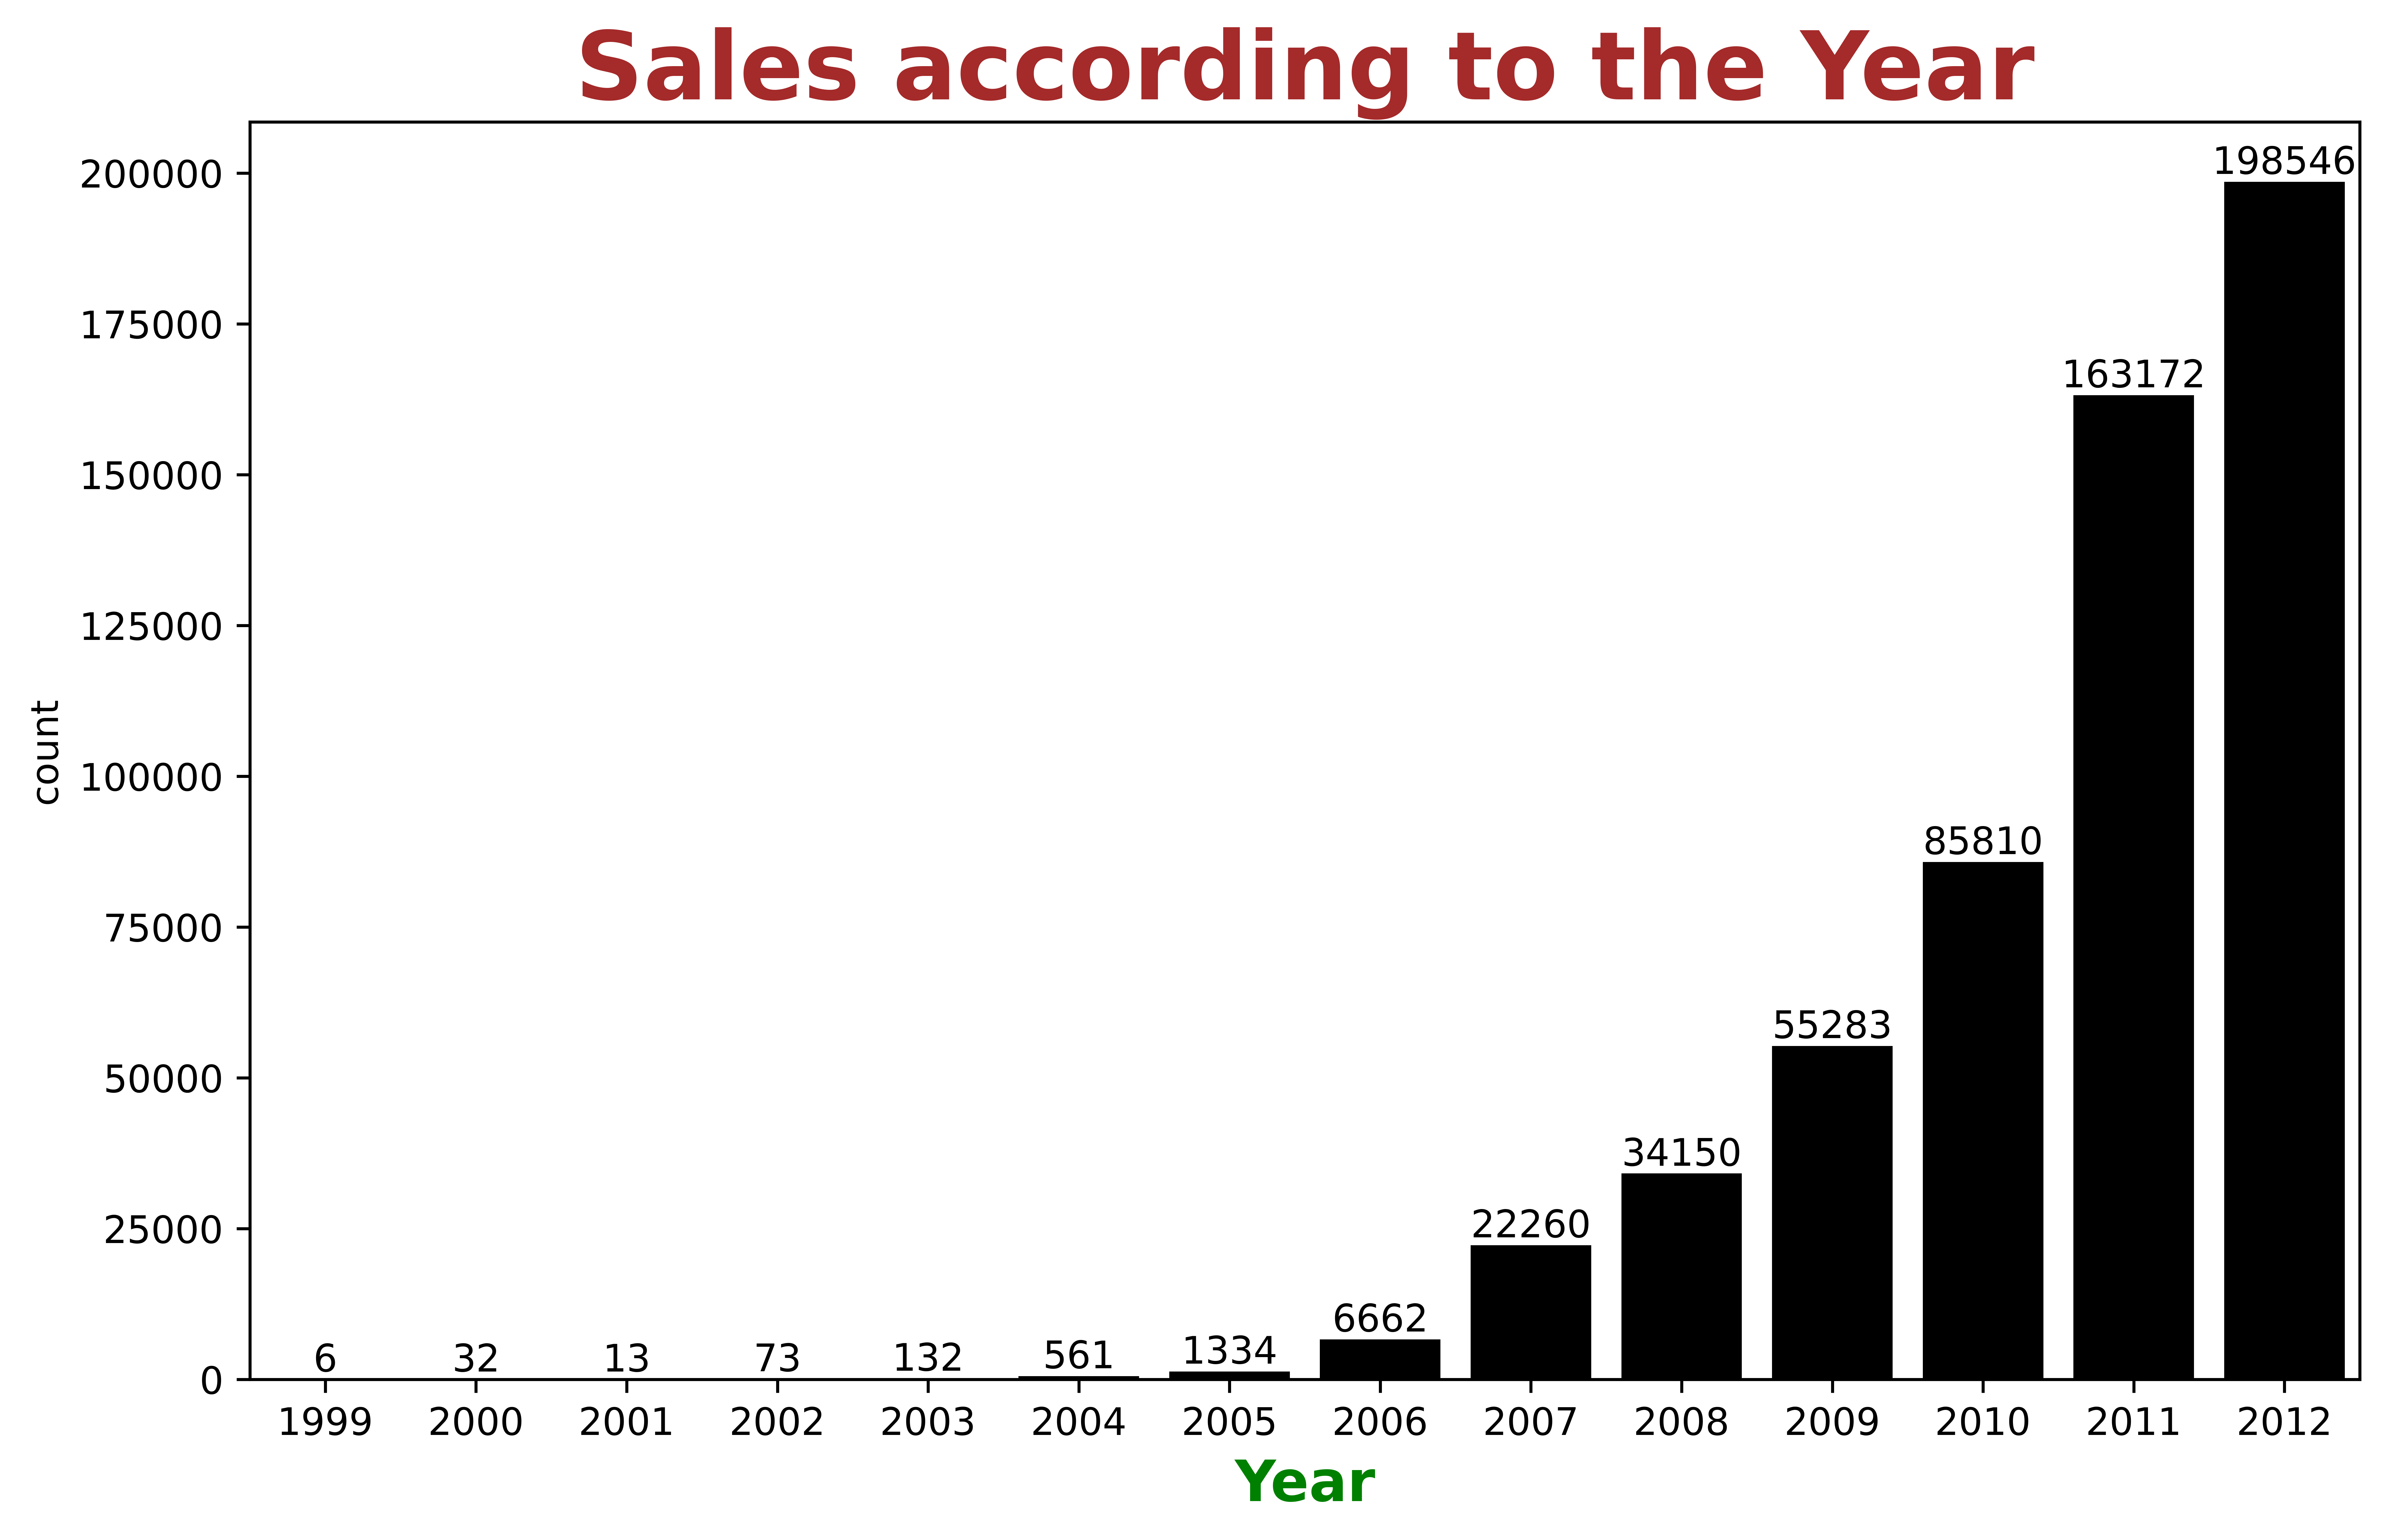

In [8]:
plt.figure(figsize=(10,6), dpi=1000)
ax = sns.countplot(x='Year',data=data, color='black')
ax.set_xlabel('Year',fontsize=15,fontweight='bold',color='green')
ax.set_title('Sales according to the Year',fontsize=25,fontweight='bold',color='brown')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, rotation=0)
plt.show()

In [9]:
plt.figure(figsize=(18,10), dpi=1000)
ax = sns.countplot(x='Year', hue='Response', data=data, palette='cubehelix')
ax.set_xlabel('Year', fontsize=20, fontweight='bold', color='darkgoldenrod')
ax.set_title('Response with respective to Years', fontsize=30, fontweight='bold', color='brown')
plt.legend(loc='center left',fontsize=15)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, rotation=90)
plt.show()



In [10]:
plt.figure(figsize=(18,10), dpi=1000)
ax = sns.countplot(x='Year', hue='Score', data=data, palette='cubehelix')
ax.set_xlabel('Year', fontsize=15, fontweight='bold', color='darkgoldenrod')
ax.set_title('Scores with respective to Years', fontsize=30, fontweight='bold', color='brown')
plt.legend(loc='center left',fontsize=15)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, rotation=90)
plt.show()



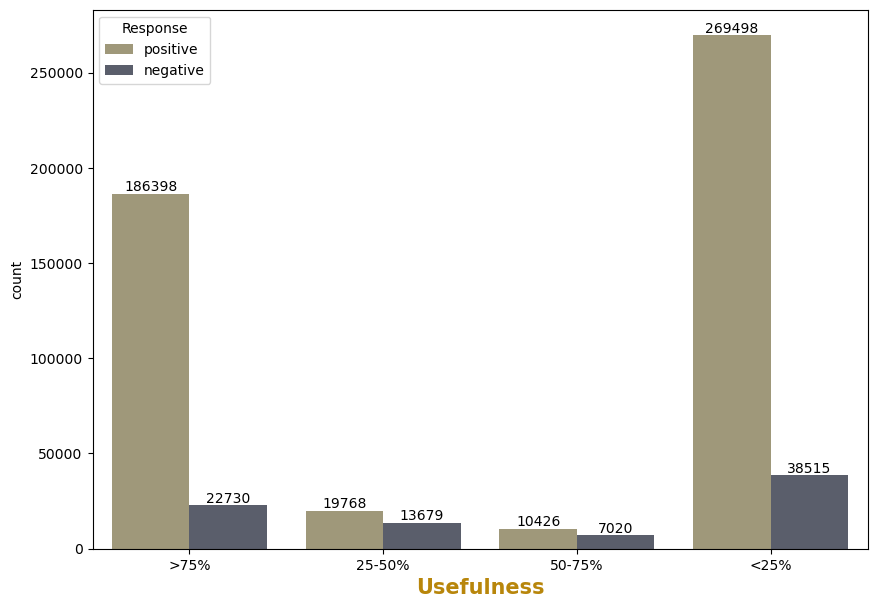

In [11]:
plt.figure(figsize=(10,7),dpi=100)
ax=sns.countplot(x='Useful', hue='Response',data=data,palette='cividis_r')
ax.set_xlabel('Response',fontsize=15,fontweight='bold',color='darkgoldenrod')
plt.xlabel('Usefulness')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, rotation=0)
plt.show()

In [12]:
a=(data[data['Response'] == 'positive']['ReviewSummary']).value_counts()
b=(data[data['Response'] == 'negative']['ReviewSummary']).value_counts()
print((a).head(10))
print((b).head(10))

Delicious        5194
Yummy            4940
Great Product    4520
Excellent        1637
Love it          1528
Awesome          1203
Tasty            1011
Amazing           823
Good stuff        806
Wonderful         779
Name: ReviewSummary, dtype: int64
Disappointing                                                820
Yuck                                                         414
Disgusting                                                   232
Horrible                                                     227
Awful                                                        207
Terrible                                                     195
Filler food is empty, leaves your cat always needing more    182
Gross                                                        171
disappointed                                                 168
Not good                                                     135
Name: ReviewSummary, dtype: int64


In [10]:
import plotly.graph_objects as go
data = data
# Set the colors for the pie chart wedges
colors = ['cream', 'brown', 'chocolate ', 'olive', '#b3b3b3']

# Plot a pie chart of the 'Response' column
fig1 = go.Figure(data=[go.Pie(labels=data['Response'].value_counts().index, 
                               values=data['Response'].value_counts().values,
                               textinfo='label+percent',
                               marker=dict(colors=colors, line=dict(color='white', width=2)))])
fig1.update_layout(title='Response', title_font=dict(size=16))

fig1.show()

# Group the data by 'ReviewSummary' and 'Response', and plot donut charts for the top 5 'ReviewSummary' values with the most 'Positive' and 'Negative' responses
grouped_data = data.groupby(['ReviewSummary', 'Response']).size().unstack(fill_value=0)
positive_data = grouped_data['positive'].nlargest(6)
negative_data = grouped_data['negative'].nlargest(6)

# Plot donut charts for positive and negative responses
fig2 = go.Figure(data=[go.Pie(labels=positive_data.index, 
                               values=positive_data.values, 
                               textinfo='label+percent', 
                               hole=0.5,
                               marker=dict(colors=colors, line=dict(color='white', width=2)))])
fig2.update_layout(title='Positive Responses', title_font=dict(size=16))
fig2.show()

fig3 = go.Figure(data=[go.Pie(labels=negative_data.index, 
                               values=negative_data.values, 
                               textinfo='label+percent', 
                               hole=0.5,
                               marker=dict(colors=colors, line=dict(color='white', width=2)))])
fig3.update_layout(title='Negative Responses', title_font=dict(size=16))
fig3.show()


In [10]:
data

ProductID         User_Id  \
0       B0000DJDL4  A1Y20KNCR0SZA1   
1       B00032EGHI  A1XBSM55RTS2IT   
2       B0007KLGC4  A2RV24L38GOIGT   
3       B0000DGF5S   AQDTYG93O2WYO   
4       B0002HVDNY   A3FVAWZNKW9GX   
...            ...             ...   
568029  B002AN4TWK  A2FW8AXHIXCP92   
568030  B000V0CW5A  A3LWC833HQIG7J   
568031  B0014L1PPS  A1M3ZIZTWMZQRQ   
568032  B00390T5JA  A3C6T903HRU0TQ   
568033  B005K4Q34S  A2MR8B8E1TXOK4   

                                             ProfileName  \
0                           Dessartfamily "grandmasoven"   
1                            Celine Johnson "C. Johnson"   
2                                          Mark L. White   
3                                        Paul L. Bardzik   
4       A.Trendl HungarianBookstore.com "What should ...   
...                                                  ...   
568029                                              vick   
568030                                      austin_Larry   
568031                                            Tiebey   
568032                                    Addie Hamilton   
568033                                         T. Rosell   

        HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
0                          8                       9      5 2004-01-01   
1                          8                       8      5 2006-01-01   
2                          8                       9      5 2006-01-01   
3                         15                      16      1 2006-01-01   
4                          1                       2      5 2006-01-01   
...                      ...                     ...    ...        ...   
568029                     0                       0      5 2011-12-31   
568030                     1                       1      4 2011-12-31   
568031                     0                       0      5 2011-12-31   
568032                     5                       5      2 2011-12-31   
568033                     0                       0      2 2011-12-31   

                                            ReviewSummary  \
0                                  The best Kringles ever   
1                               Vanilla Coke is On Hiatus   
2                                              best candy   
3                                              Broken pot   
4                         Slowly Smoked Pork is Delicious   
...                                                   ...   
568029                          This stuff is kitty crack   
568030  Good value, not oily, crisp, fresh, but domina...   
568031                                       Great flavor   
568032                                 VERY DISAPPOINTING   
568033                          After taste not that good   

                                               ReviewText  Helpfulness  \
0       others try make kringles one bakery make real ...    88.888889   
1       read press release cocacola vanilla coke put h...   100.000000   
2       mallo cup candy best candy ever made put marke...    88.888889   
3       sure plant going survive pot broken opened box...    93.750000   
4       buy karaj hungarian pork loin regularly local ...    50.000000   
...                                                   ...          ...   
568029  bff line great cat adore point occasionally go...     0.000000   
568030  overall one better veggie stix tried liked muc...   100.000000   
568031  great hot sauce perfectly combine hotness flav...     0.000000   
568032  model year hasnt worked right beginning often ...   100.000000   
568033  machine empty k cup dry content good watery ev...     0.000000   

        Response  Useful  Year  
0       positive    >75%  2004  
1       positive    >75%  2006  
2       positive    >75%  2006  
3       negative    >75%  2006  
4       positive  25-50%  2006  
...          ...     ...   ...  
568029  positive    <25%  2011  
568030  positive    >75%  2011  
568031  positive    <25

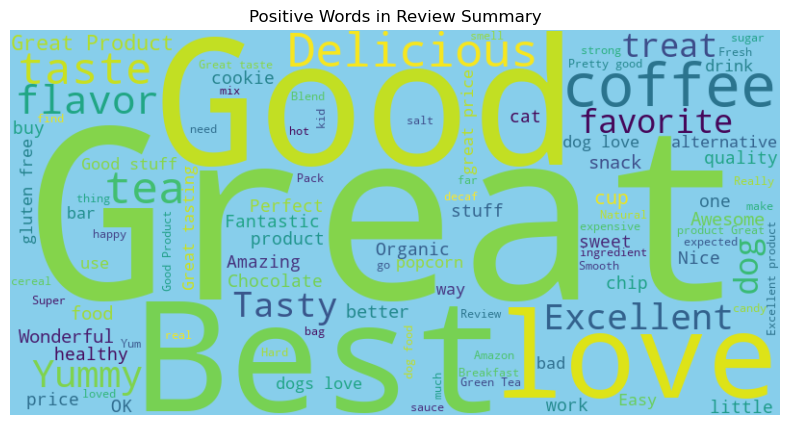

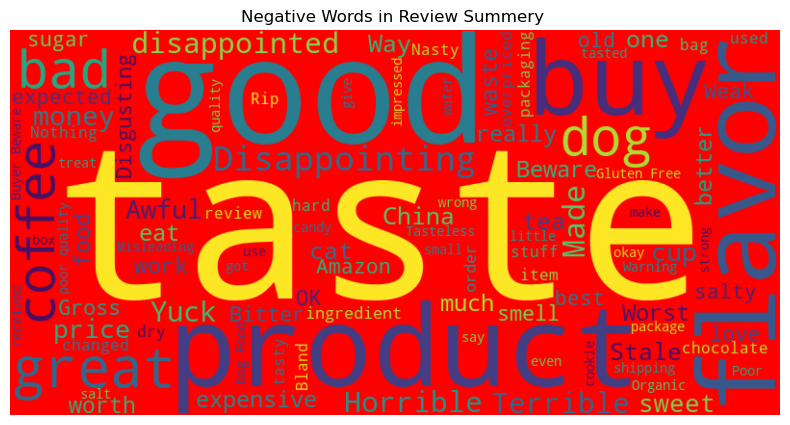

In [23]:
word1 = data[data['Response'] == 'positive']['ReviewSummary']
random_sample = word1.sample(n=10000, random_state=42)
wordcloud_text = " ".join(random_sample)

cloud = WordCloud(width=800, height=400, max_words=100, background_color='skyblue').generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.title('Positive Words in Review Summary')
plt.axis('off')
plt.show()
word2 = data[data['Response'] == 'negative']['ReviewSummary']
wordcloud2= " ".join(word2.tail(100000))
cloud2 = WordCloud(width=800, height=400, max_words=100, background_color='red').generate(wordcloud2)
plt.figure(figsize=(10, 5))
plt.imshow(cloud2, interpolation='bilinear')
plt.title('Negative Words in Review Summery ')
plt.axis('off')
plt.show()



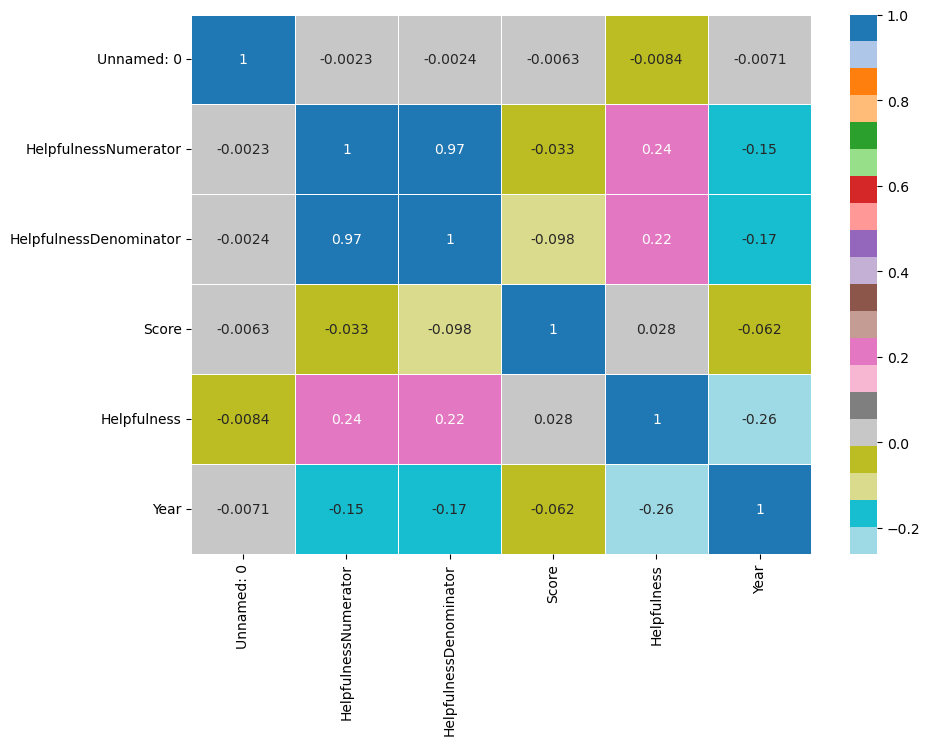

In [15]:
plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(data.corr(),annot=True,cmap='tab20_r',linewidth=0.5,linecolor='white')
plt.show()

# $\color{red}{\text{Conclusion of Exploratory Data Analysis :}}$
- During the analysis new columns Year, Useful, and Response are created.
- The Useful were categorized into four quartiles based on their helpfulness: less than 25%, 25-50%, 50-75%, and greater than   75%.
- Out of a total of 568,454 reviews, the majority (362,873 reviews) had the highest rating, accounting for 65% of the total reviews.
- Approximately 85% of the reviews had positive sentiment, indicating that the review scores were 3, 4, or 5.
- There has been a consistent increase in sales year by year.
- The years 2011 and 2012 witnessed the highest sales, with 65% of the products being sold during this period.
- The distribution of usefulness ratings for the reviews showed that 48% fell within the less than 25% category, 35% were in the less than 75% category, and the remaining reviews were spread between 25% and 75% usefulness.
- The WordCloud Visualizations showcased the most frequent positive and negative words used in the ReviewSummary.


# $$\color{darkred}{\text{Model Building for Sentimental Analysis}}$$

### Reading Data(CSV) file for Model Building

In [14]:
df=pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\Text_dataprocessed.csv")
df.head()

ProductID         User_Id  \
0  B0000DJDL4  A1Y20KNCR0SZA1   
1  B00032EGHI  A1XBSM55RTS2IT   
2  B0007KLGC4  A2RV24L38GOIGT   
3  B0000DGF5S   AQDTYG93O2WYO   
4  B0002HVDNY   A3FVAWZNKW9GX   

                                        ProfileName  HelpfulnessNumerator  \
0                      Dessartfamily "grandmasoven"                     8   
1                       Celine Johnson "C. Johnson"                     8   
2                                     Mark L. White                     8   
3                                   Paul L. Bardzik                    15   
4  A.Trendl HungarianBookstore.com "What should ...                     1   

   HelpfulnessDenominator  Score        Time                    ReviewSummary  \
0                       9      5  01-01-2004           The best Kringles ever   
1                       8      5  01-01-2006        Vanilla Coke is On Hiatus   
2                       9      5  01-01-2006                       best candy   
3                      16      1  01-01-2006                       Broken pot   
4                       2      5  01-01-2006  Slowly Smoked Pork is Delicious   

                                          ReviewText  Helpfulness  
0  others try make kringles one bakery make real ...    88.888889  
1  read press release cocacola vanilla coke put h...   100.000000  
2  mallo cup candy best candy ever made put marke...    88.888889  
3  sure plant going survive pot broken opened box...    93.750000  
4  buy karaj hungarian pork loin regularly local ...    50.000000

#### Converting Score Column in 0(less than 3) and 1(greater than or equal to 3) for convenience 

In [15]:
df['Score'] = np.where(df['Score'] < 3, 0, 1)
df.dropna(subset=['Score','ReviewText'], inplace=True)

#### Selecting the "ReviewText" and "Score" columns from the dataset to train and test the model. The goal is to predict the "Score" based on the "ReviewText".

In [21]:
df = df.reindex(columns=['ReviewText','Score'])
df.head()

ReviewText  Score
0  others try make kringles one bakery make real ...      1
1  read press release cocacola vanilla coke put h...      1
2  mallo cup candy best candy ever made put marke...      1
3  sure plant going survive pot broken opened box...      0
4  buy karaj hungarian pork loin regularly local ...      1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Score', axis=1),
                                                    df['Score'], test_size=0.25,random_state=65)

#### The code saves the train and test data from a DataFrame using the Pickle module, which allows for easy serialization and deserialization of Python objects. The saved data can be used later to train or test a models.

In [24]:
import pickle
data = {'X_train': X_train,
        'X_test': X_test,
        'Y_train': Y_train,
        'Y_test': Y_test}
filename = 'data.pkl'
with open(filename, 'wb') as file:
    pickle.dump(data, file)


#### CountVectorizer class from sklearn to convert the ReviewText data into a matrix of token counts.This process creates a matrix of token counts that can be used as input data for machine learning algorithms.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics

# Concatenate training and test data
X_all = pd.concat([X_train['ReviewText'], X_test['ReviewText']])

# Fit CountVectorizer on concatenated data
vectorizer = CountVectorizer()
X_all_final = vectorizer.fit_transform(X_all)

# Split back into training and test data
X_train_final = X_all_final[:len(X_train)]
X_test_final = X_all_final[len(X_train):]



In [26]:
import pickle
data = {'X_train_final': X_train_final,
        'X_test_final': X_test_final}
filename = 'data_final.pkl'
with open(filename, 'wb') as file:
    pickle.dump(data, file)


## $\color{chocolate}{\text{Building Models using Train and Test data from DataFrame:}}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score

#### Reading Train & Test data of the given DataFrame which was saved before Using Pickle Module

In [ ]:
import pickle

In [27]:
filename = r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\data.pkl"
with open(filename, 'rb') as file:
    data = pickle.load(file)
Y_train = data['Y_train']
Y_test = data['Y_test']


In [28]:
Y_train.head()

48712     1
445161    1
518944    1
514759    0
379350    1
Name: Score, dtype: int32

In [29]:
Y_test.head()

272528    0
461058    1
472264    1
475759    1
441618    1
Name: Score, dtype: int32

In [30]:
filename = r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\data_final.pkl"
with open(filename, 'rb') as file:
    data = pickle.load(file)
X_train_final = data['X_train_final']
X_test_final = data['X_test_final']


In [31]:
X_train_final

<425997x199906 sparse matrix of type '<class 'numpy.int64'>'
	with 13198459 stored elements in Compressed Sparse Row format>

In [22]:
X_test_final

<142009x199906 sparse matrix of type '<class 'numpy.int64'>'
	with 4400965 stored elements in Compressed Sparse Row format>

In [23]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
Confusion_matrix=[]
F1_score=[]

### $\color{green}{\text{LogisticRegression:}}$

In [24]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_final, Y_train)
y_test_pred = regressor.predict(X_test_final)
from sklearn import metrics
a=metrics.accuracy_score(Y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(Y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(Y_test,y_test_pred))
F1_score.append(metrics.f1_score(Y_test,y_test_pred))
print(a)

0.9247512481603278


###  $\color{maroon}{\text{RandomForestClassifier:}}$

In [25]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train_final, Y_train)
y_test_pred = regressor.predict(X_test_final)
a = metrics.accuracy_score(Y_test, y_test_pred)
Algorithm.append("RandomForest")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(Y_test, y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(Y_test, y_test_pred))
F1_score.append(metrics.f1_score(Y_test, y_test_pred))
print(a)


0.9213359716637678


### $\color{red}{\text{KNeighborsClassifier:}}$

In [26]:
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier()
regressor.fit(X_train_final, Y_train)

# Predict on test data
y_test_pred = regressor.predict(X_test_final)

# Evaluate model performance
a = metrics.accuracy_score(Y_test, y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(Y_test, y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(Y_test, y_test_pred))
F1_score.append(metrics.f1_score(Y_test, y_test_pred))

print(a)


0.8787752888901408


### $\color{purple}{\text{DecisionTreeClassifier:}}$

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT_classification=DecisionTreeClassifier()
DT_classification.fit(X_train_final,Y_train)
y_test_pred=DT_classification.predict(X_test_final)
a=metrics.accuracy_score(Y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(Y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(Y_test,y_test_pred))
F1_score.append(metrics.f1_score(Y_test,y_test_pred))

print(a)

0.9073298171242667


### $\color{orange}{\text{XGBoost:}}$

In [28]:
pip install xgboost

In [29]:
import xgboost as xgb

# create a DMatrix object for training data
dtrain = xgb.DMatrix(X_train_final, label=Y_train)

# create a DMatrix object for test data
dtest = xgb.DMatrix(X_test_final, label=Y_test)

# set the hyperparameters for XGBoost
params = {'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'}

# train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# make predictions on the test data
y_test_pred = xgb_model.predict(dtest)

# round the predicted probabilities to binary values
y_test_pred = [1 if p >= 0.5 else 0 for p in y_test_pred]

# calculate and print the accuracy score
a = metrics.accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", a)

# append the algorithm and evaluation metrics to lists
Algorithm.append("XGBoost")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(Y_test, y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(Y_test, y_test_pred))
F1_score.append(metrics.f1_score(Y_test, y_test_pred))


Accuracy score: 0.8739234837228627


In [30]:
filename= 'algorithm_data'
data = {'Algorithm': Algorithm,
        'Accuracy_score': Accuracy_score,
        'Precision_score': Precision_score,
        'Confusion_matrix': Confusion_matrix,
        'F1_score': F1_score}
with open('algorithm_data', 'wb') as file:
    pickle.dump(data, file)



In [31]:
import pickle
filename=r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML_Project\algorithm_data"
with open(filename, 'rb') as f:
    data = pickle.load(f)

algorithm = data['Algorithm']
accuracy_score = data['Accuracy_score']
precision_score = data['Precision_score']
confusion_matrix = data['Confusion_matrix']
f1_score = data['F1_score']


In [32]:
Algorithm,Accuracy_score,Precision_score,Confusion_matrix,F1_score

(['LogisticRegression',
  'RandomForest',
  'KNeighborsClassifier',
  'DecisionTreeClassifier',
  'XGBoost'],
 [0.9247512481603278,
  0.9213359716637678,
  0.8787752888901408,
  0.9073298171242667,
  0.8739234837228627],
 [0.9412635381934221,
  0.916890687769958,
  0.8999846708055491,
  0.94103625847075,
  0.8738398967354857],
 [array([[ 13041,   7381],
         [  3305, 118282]], dtype=int64),
  array([[  9416,  11006],
         [   165, 121422]], dtype=int64),
  array([[  7373,  13049],
         [  4166, 117421]], dtype=int64),
  array([[ 13174,   7248],
         [  5912, 115675]], dtype=int64),
  array([[  2927,  17495],
         [   409, 121178]], dtype=int64)],
 [0.9567805864509605,
  0.956022282148692,
  0.9317019563035345,
  0.9461780704265674,
  0.9312072542841774])

- Converting the Metric Values into Dataframe to save the Models values

In [132]:
out_come =pd.DataFrame({"Algorithm":Algorithm,"Accuracy_score":Accuracy_score,"Precision_score":Precision_score,
                      "F1_score":F1_score},index=Algorithm)


In [133]:
out_come.to_csv('out_come_values.csv')

In [54]:
out_come=pd.read_csv(r'out_come_values.csv')
out_come

Algorithm  Accuracy_score  Precision_score  F1_score
0      LogisticRegression        0.924751         0.941264  0.956781
1            RandomForest        0.921336         0.916891  0.956022
2    KNeighborsClassifier        0.878775         0.899985  0.931702
3  DecisionTreeClassifier        0.907330         0.941036  0.946178
4                 XGBoost        0.873923         0.873840  0.931207

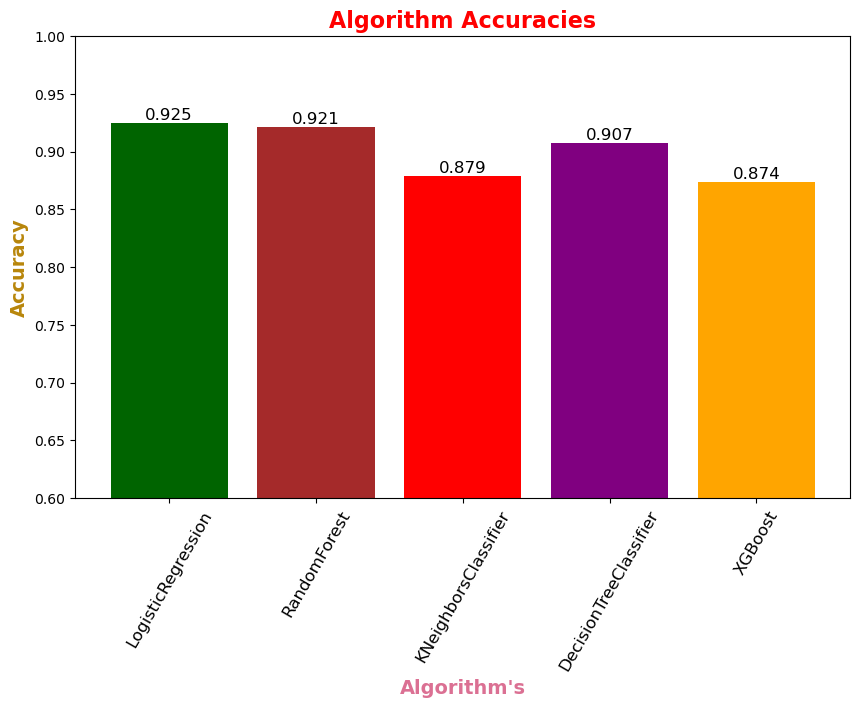

In [12]:
colors = ['darkgreen', 'brown', 'red', 'purple', 'orange']
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(out_come["Algorithm"],out_come["Accuracy_score"], color=colors)
ax.set_ylim(0.6, 1)
ax.set_title('Algorithm Accuracies', fontsize=16, fontweight='bold',color='red')
ax.set_xlabel("Algorithm's", fontsize=14,fontweight='bold',color='palevioletred')
ax.set_ylabel('Accuracy', fontsize=14,fontweight='bold',color='darkgoldenrod')

for i, v in enumerate(out_come["Accuracy_score"]):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=60, fontsize=12)
plt.show()

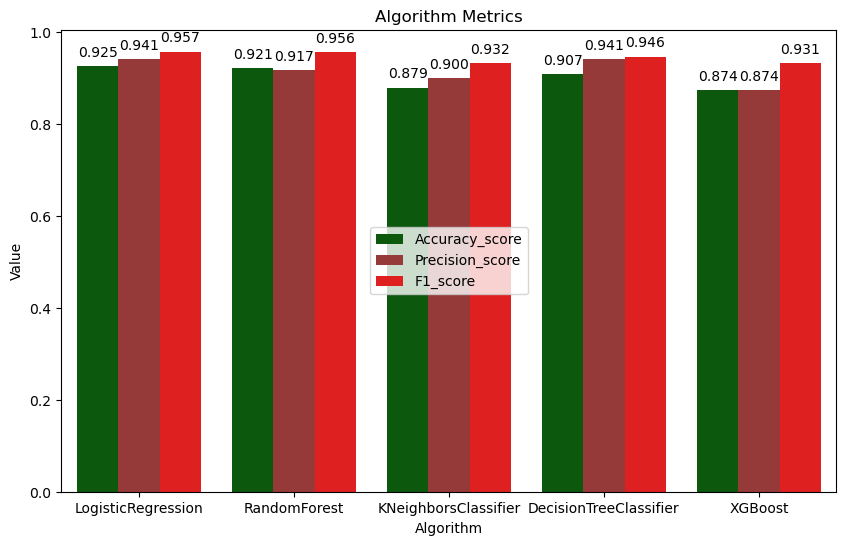

In [60]:
df_melt = pd.melt(out_come, id_vars=['Algorithm'], var_name='Metric', value_name='Value')

colors = {'Accuracy_score': 'darkgreen', 'Precision_score': 'brown', 'F1_score': 'red'}
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melt, palette=colors)
plt.xlabel("Algorithm")
plt.ylabel("Value")
plt.title("Algorithm Metrics")
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend(loc='center')
plt.show()


### $\color{green}{\text{Observations:}}$

1. Logistic Regression has the highest accuracy, precision and F1 score among all the algorithms used.
2. Random Forest also performed well with an accuracy of 0.9213 and a precision score of 0.9169.
3. K-Nearest Neighbors had a lower accuracy of 0.8788 but a higher precision score of 0.8999 compared to Random Forest.
4. Decision Tree Classifier performed well with an accuracy of 0.9073 and a high precision score of 0.9410.
5. XGBoost had the lowest accuracy among all the algorithms with an accuracy of 0.8739 but had a precision score of 0.8738.

### $\color{blue}{\text{Conclusion:}}$
1. The observations made indicate that Logistic Regression is the best algorithm for this classification problem.
2. Logistic Regression had the highest accuracy, precision, and F1 score.
3. Random Forest and Decision Tree Classifier performed well and can be used as alternatives to Logistic Regression.
4. K-Nearest Neighbors and XGBoost did not perform as well and can be considered as less preferred algorithms for this classification problem.